In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1. Apply PCA to the images from folder 'Grapevine leaves images'. How many components do you need to preserve 95% of the variance?

The PCA analysis shows that **89 components** are required to preserve 95% of the variance in the image dataset.

This analysis demonstrates the power of PCA in reducing the dimensionality of image datasets while retaining a significant portion of the original variance, with 89 components out of the total encapsulating 95% of the variance.

In [ ]:
from google.colab import drive
import os
import numpy as np
from sklearn.decomposition import PCA
from skimage import io, color, img_as_float
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
# If your drive is already mounted, you don't need to run this again.
# drive.mount('/content/drive')

# Set the path to the folder containing your images
folder_path = '/content/drive/MyDrive/aml-homework1-shared-folder/Grapevine_Leaves_Image_Dataset/train'

# Load images from the folder
image_list = []
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')): # Make sure to load supported image formats
        img = io.imread(os.path.join(folder_path, filename))

        # Check if the image has an alpha channel (4th channel)
        if img.shape[-1] == 4:
            # Discard the alpha channel
            img = img[..., :3]

        # Convert the image to grayscale
        img_gray = color.rgb2gray(img_as_float(img))
        image_list.append(img_gray.flatten())

# Convert the list of images to a NumPy array
images = np.array(image_list)

# Apply PCA
pca = PCA()
pca.fit(images)

# Calculate the cumulative explained variance
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 95% variance
num_components_95_percent = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

print(f"Number of components needed for 95% variance: {num_components_95_percent}")


Number of components needed for 95% variance: 89


The following plot visualizes the cumulative explained variance by the principal components of the PCA applied to the dataset.

This plot aids in selecting the optimal number of principal components to achieve a balance between dimensionality reduction and information retention. For instance, to retain 95% of the variance, we may choose the number of components at the point where the curve first crosses the 0.95 threshold on the Y-axis.

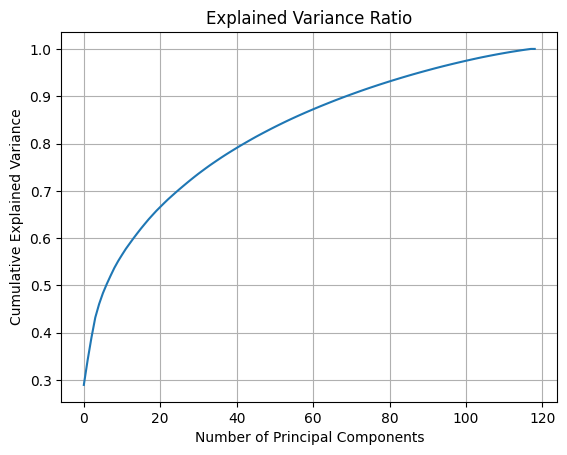

In [ ]:
import matplotlib.pyplot as plt


plt.plot(explained_variance_ratio_cumulative )
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

###2. Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 95% of variance using PCA.
The top row displays the original images.

The bottom row shows the reconstructed images after applying PCA to preserve 95% of the variance.

The original images show the full detail as they appeared before any processing.

The reconstructed images after PCA demonstrate how much of the original information is retained while significantly reducing the dimensions of the data.

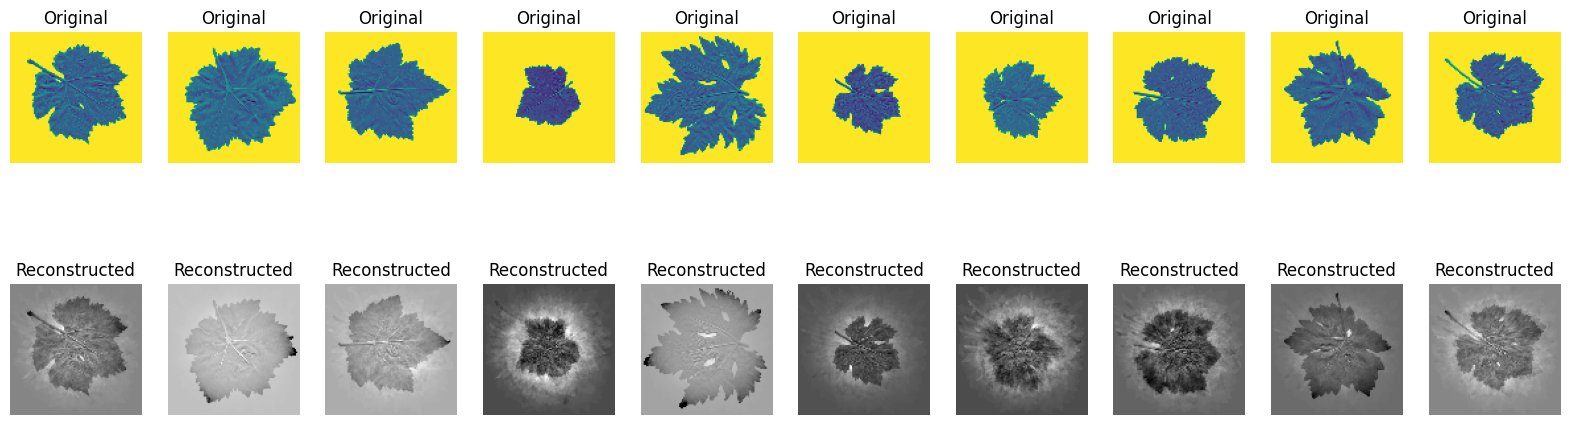

In [ ]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to read images from a folder
def read_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
            img = cv2.resize(img, (100, 100))  # Resize images if needed
            images.append(img.flatten())  # Flatten the image and append to the list
    return np.array(images)

# Function to plot original and reconstructed images
def plot_images(original, reconstructed, num_images=10):
    plt.figure(figsize=(20, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].reshape(100, 100))
        plt.imshow(original[i].reshape(100, 100))
        plt.title('Original')
        plt.axis('off')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(reconstructed[i].reshape(100, 100), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    plt.show()


X = read_images(folder_path)

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA to keep 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_standardized)

# Reconstruct the original images from PCA
X_reconstructed = pca.inverse_transform(X_pca)

# Plot 10 images in original and reconstructed form
plot_images(X, X_reconstructed, num_images=10)


###3. Each of the images belongs to one of 4 leaves categories. The category is indicated by the first letter in the filename (A, B, D and N). We will now try to see if the visualization can help us identify different clusters.

###A. Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components?
The PCA scatter plot for the grapevine leaves image dataset demonstrates that the first two principal components account for 34.21% of the variance in the data.

Each data point represents an image of a grapevine leaf, and the color coding—red for Category A, green for Category B, blue for Category D, and cyan for Category N—illustrates the distinct groupings of the different categories within the two-dimensional PCA feature space.

The scatter plot below shows the PCA-transformed data in a 2D space, with each point representing an image and its color indicating its category.

The plot reveals the distribution of the images in the reduced space, with distinct clusters corresponding to different categories. Despite capturing only a fraction of the total variance, the PCA transformation provides insights into the dataset's underlying structure.






Variance explained by the first two components: 34.21%


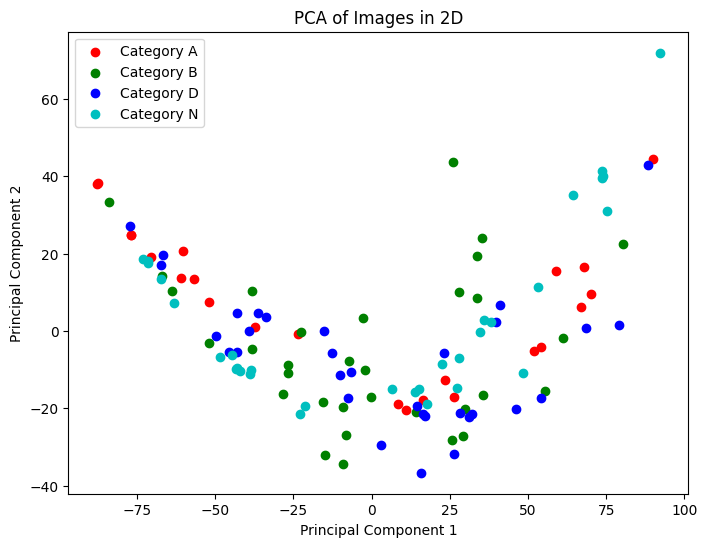

In [ ]:

# Load images from the folder and extract labels
image_list = []
labels = []
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        img = io.imread(os.path.join(folder_path, filename))
        if img.ndim == 3 and img.shape[2] == 4:  # Check if the image has an alpha channel
            img = img[..., :3]  # Discard the alpha channel
        img_gray = color.rgb2gray(img_as_float(img))
        image_list.append(img_gray.flatten())
        labels.append(filename[0])  # Extract the first letter as the category

# Convert the list of images to a NumPy array
images = np.array(image_list)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Variance explained by the first two components: {explained_variance_ratio.sum() * 100:.2f}%")

# Scatter plot of the data in 2D space
plt.figure(figsize=(8, 6))
categories = ['A', 'B', 'D', 'N']
colors = ['r', 'g', 'b', 'c']  # Adjust the colors as needed
for category, color in zip(categories, colors):
    indices = [i for i, label in enumerate(labels) if label == category]
    plt.scatter(images_pca[indices, 0], images_pca[indices, 1], c=color, label=f'Category {category}')

plt.title('PCA of Images in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


###B. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some leaf images to the visualization to better understand what features in the images are accounting for the majority of variance in the data. Repeat the process and create the same type of plots for t-SNE, LLE and MDS.

The scatter plot showcases a 2D representation of the grapevine leaves dataset, achieved through dimensionality reduction. Each dot symbolizes an individual leaf image, positioned according to the first two principal components derived from the dataset. The varying colors of the dots signify different categories of leaves, providing an immediate visual cue to the clustering of similar leaves.

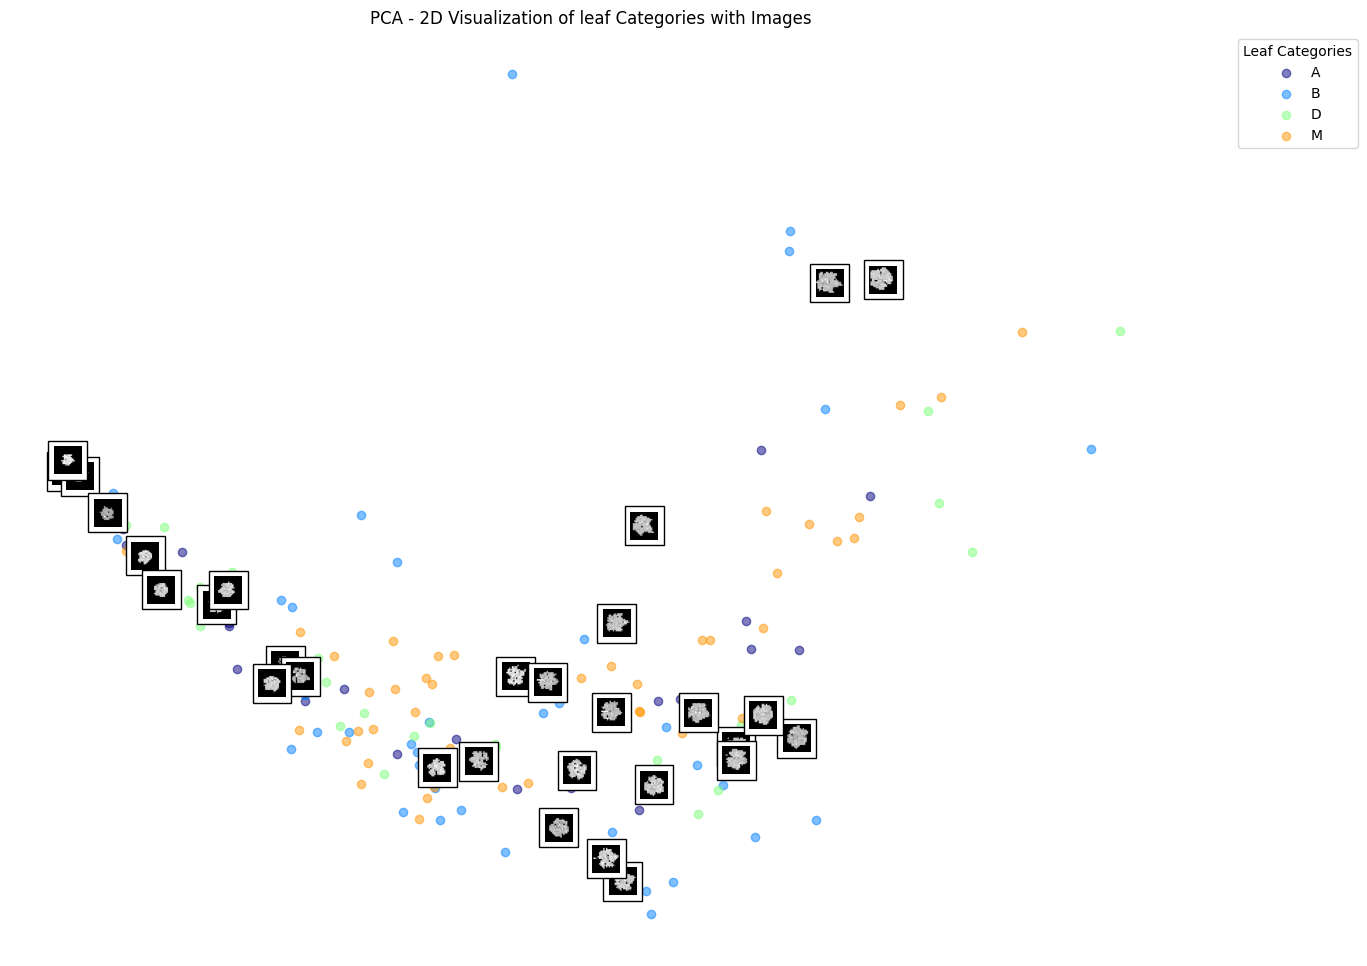

In [ ]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.pyplot as plt

# Function to read images and labels from a folder
def read_images_with_labels(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (20, 20))
            images.append(img.flatten())
            labels.append(filename[0])
    return np.array(images), labels

X, labels = read_images_with_labels(folder_path)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Standardize the data
X_normalized = MinMaxScaler().fit_transform(X)

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Visualize the data points with a limited number of images
def plot_leaf(X, y, max_images=5, min_distance=0.04, images=None, figsize=(15, 12)):
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    rock_categories = np.unique(y)
    ax = plt.gca()

    dict_cat={0:'A',1:'B',2:'D',3:'M'}
    for category in rock_categories:
        plt.scatter(X[y == category, 0], X[y == category, 1],
                    c=[cmap(float(category) / len(rock_categories))], alpha=0.5, label=str(dict_cat[category]))

    plt.legend(title='Leaf Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.axis("off")

    neighbors = np.array([[10., 10.]])
    displayed_images = 0

    for index, image_coord in enumerate(X):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance and displayed_images < max_images:
            neighbors = np.r_[neighbors, [image_coord]]
            displayed_images += 1
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(y[index]),
                         color=cmap(float(y[index]) / len(rock_categories)),
                         fontdict={"weight": "bold", "size": 16})
            else:
                rock_image = images[index].reshape(20, 20)
                imagebox = AnnotationBbox(OffsetImage(rock_image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

plot_leaf(X_pca, y_encoded, max_images=30, images=X)

plt.title('PCA - 2D Visualization of leaf Categories with Images')
plt.show()


**t-SNE Visualization:** This plot is showing the groups of similar leaves. It's good at showing these groups, especially when there are many different types of leaves.

**LLE Plot**: This plot focuses on keeping leaves that are close to each other in the original data close in the plot. It's like keeping neighbors together.

**MDS Plot:** In this plot, I am trying to keep the distances between leaves the same as they were in the original data. If two leaves were far apart originally, I want to make sure they're still far apart in the plot. It's like keeping the same spaces between **leaves**.

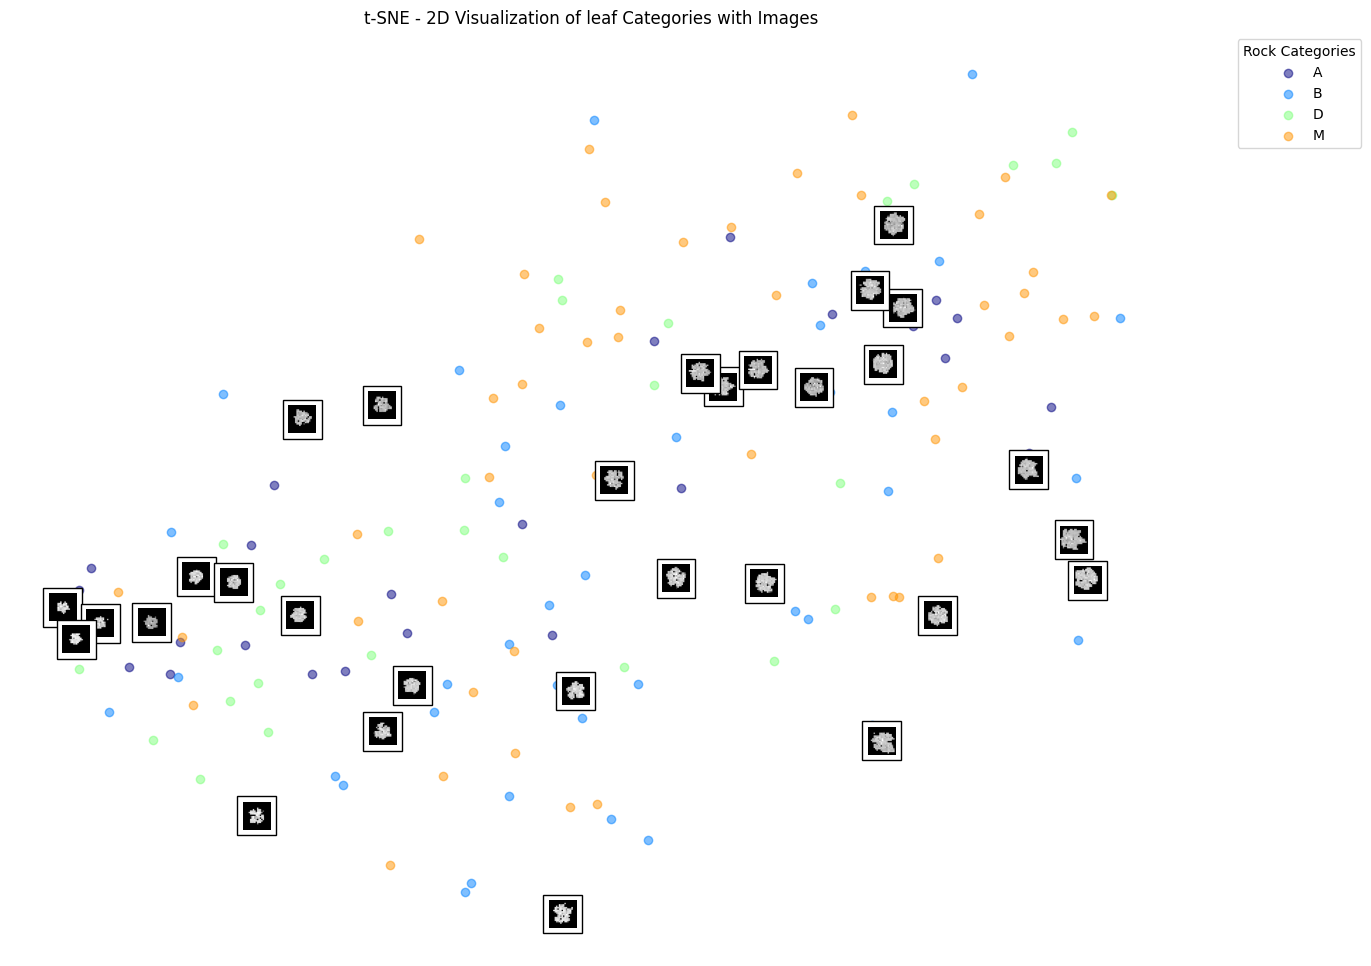

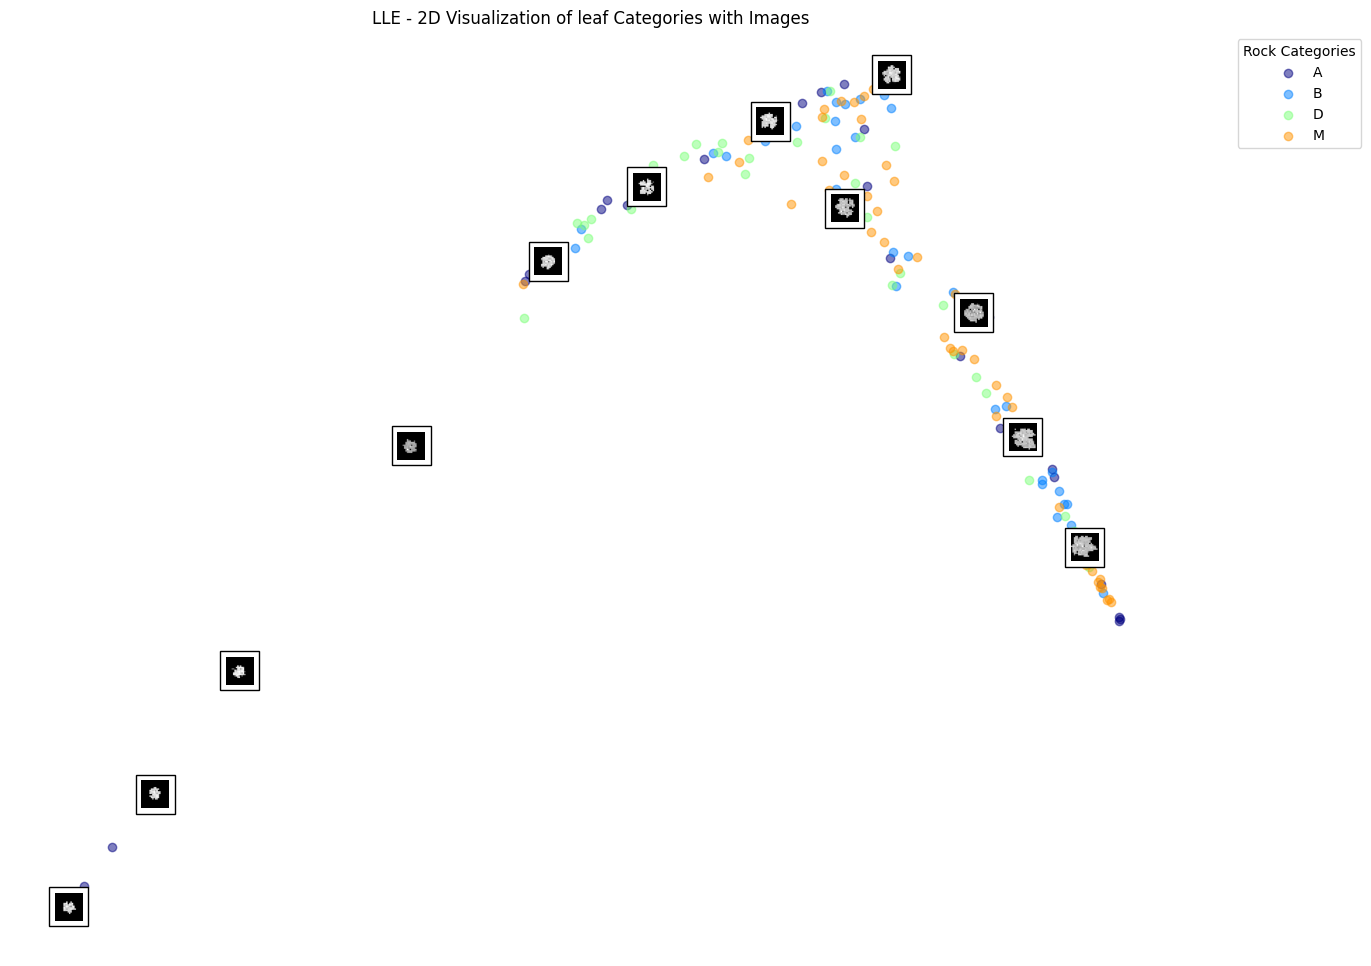

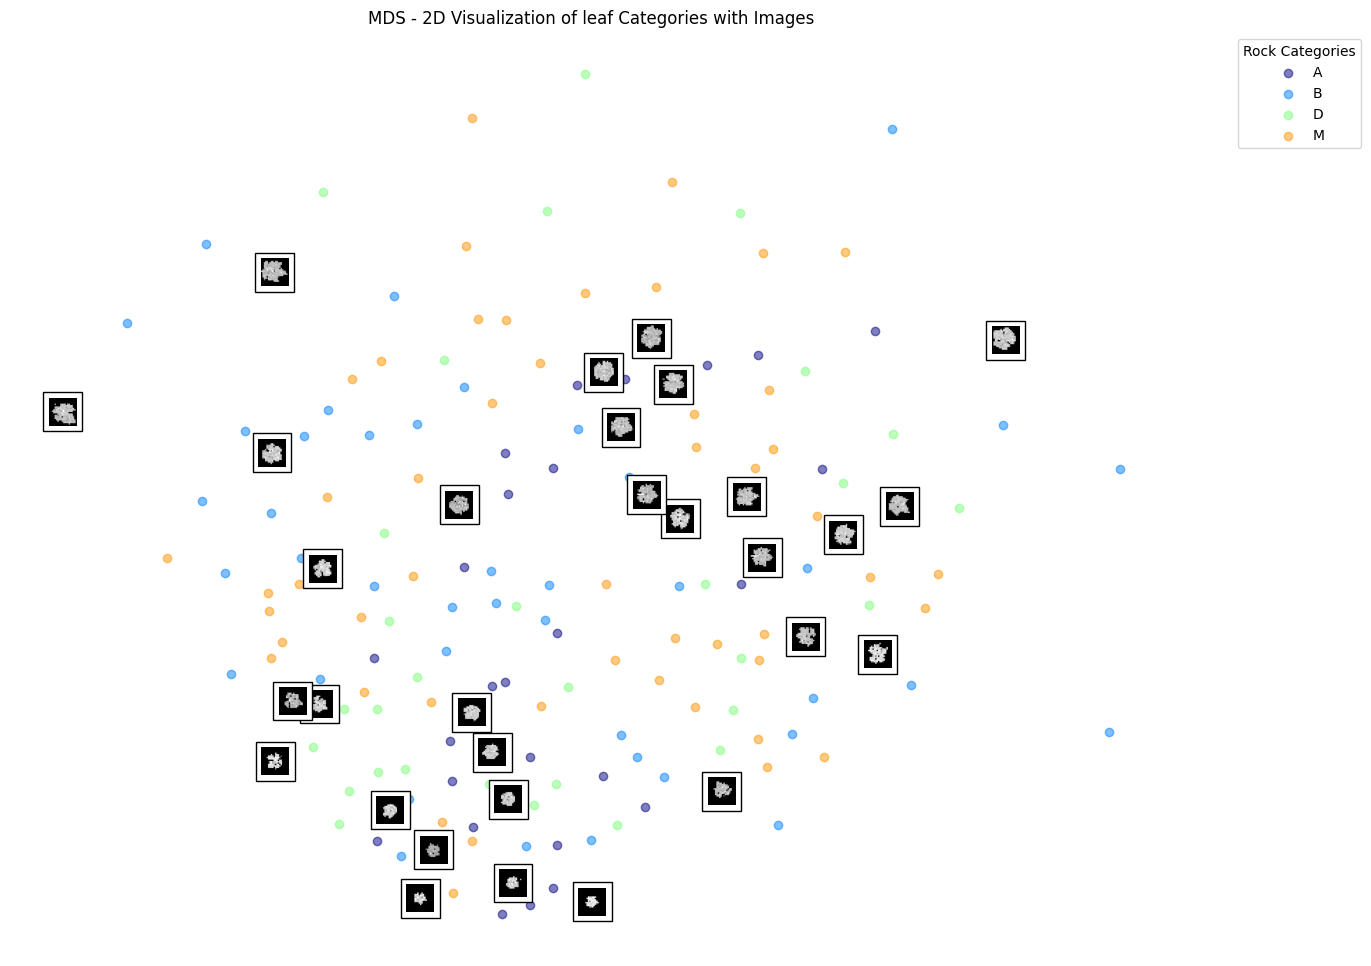

In [ ]:
import os
import numpy as np
import cv2
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.pyplot as plt

# Function to read images and labels from a folder
def read_images_with_labels(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
            img = cv2.resize(img, (20, 20))  # Resize images if needed
            images.append(img.flatten())  # Flatten the image and append to the list
            labels.append(filename[0])  # Use the first letter as the label
    return np.array(images), labels



X, labels = read_images_with_labels(folder_path)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Standardize the data
X_normalized = MinMaxScaler().fit_transform(X)

# Perform t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

# Perform LLE to reduce dimensionality to 2 components
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X_normalized)

# Perform MDS to reduce dimensionality to 2 components
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_normalized)

plot_rocks(X_tsne, y_encoded, max_images=30, images=X)
plt.title('t-SNE - 2D Visualization of leaf Categories with Images')
plt.show()
plot_rocks(X_lle, y_encoded, max_images=30, images=X)
plt.title('LLE - 2D Visualization of leaf Categories with Images')
plt.show()

plot_rocks(X_mds, y_encoded, max_images=30, images=X)
plt.title('MDS - 2D Visualization of leaf Categories with Images')
plt.show()

plt.show()


###C. Which of the visualizations do you prefer?
Out of all the visualizations that I tried this data on, t-SNE gave the best clustering results.
I prefer t-SNE for following reasons:

**Cluster Visibility:** t-SNE is excellent at creating distinct clusters, even in very complex datasets. This makes it easier to see how the data is grouped and to identify patterns that may not be evident in other types of visualizations.

**Preservation of Local Structure:** t-SNE maintains the local structure of the data, meaning that similar data points are placed close to each other in the visualization. This can give a good intuitive understanding of the data's underlying structure.

**Highlighting Non-linear Relationships:** t-SNE can capture non-linear relationships between points, which other linear methods like PCA or MDS might not reveal. This is particularly useful in datasets where the interesting structure is non-linear.

**Ease of Interpretation:** The visual output of t-SNE is often more interpretable, providing clear separation between different types of data points. This can make it easier to draw conclusions about the nature of the data.

**Detecting Outliers:** t-SNE can sometimes separate outliers from the rest of the data points more clearly than other methods, which can be useful for anomaly detection.




###5. Cluster the 360 images using K-Means.


###A. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class.
I have calculated number of optimal clusters in K-means using Elbow method as well as Silhoutte method.

Elbow Method Plot:

It suggests that after 4 clusters, the decrease in inertia becomes more gradual. This can indicate that four clusters are a reasonable choice for this dataset. The inertia value, which is the within-cluster sum of squares, decreases significantly as the number of clusters increases from 1 to 4, suggesting that each additional cluster up to four provides a substantial gain in defining the data structure.

###B. Visualize the clusters


K-Means Clustering with Decision Boundaries:

In the clustering visualization, 4 clusters are differentiated by distinct colors representing the decision boundaries. The clusters appear well-defined, with each cluster having a centroid marked by a black 'X'. This visual separation supports the choice of 4 clusters, showing a clear distinction between different groupings in the dataset. The spread and positioning of the data points within each boundary indicate that the PCA reduction has retained significant variance and the K-means algorithm has effectively identified distinct groups.

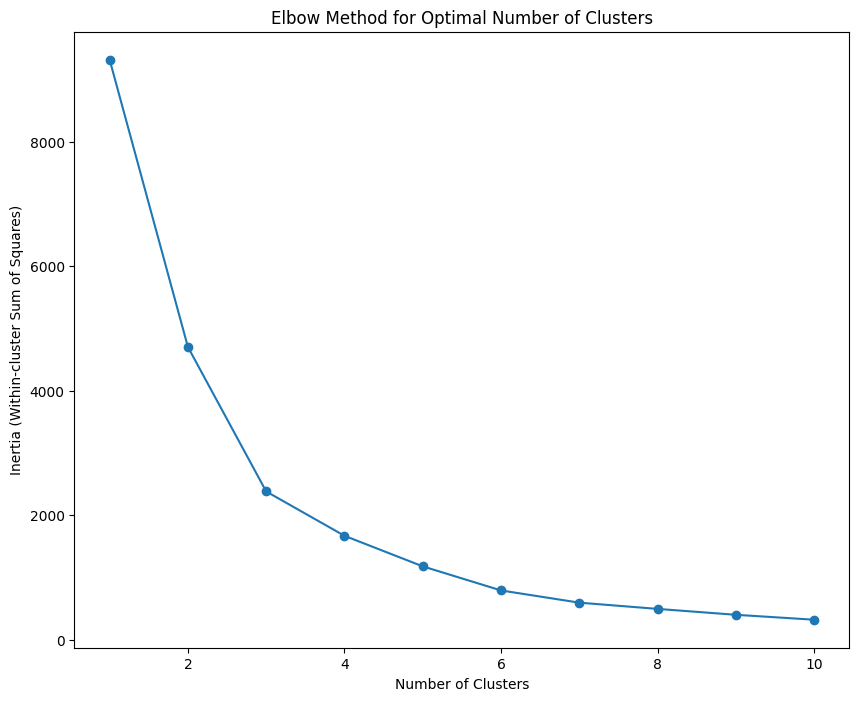

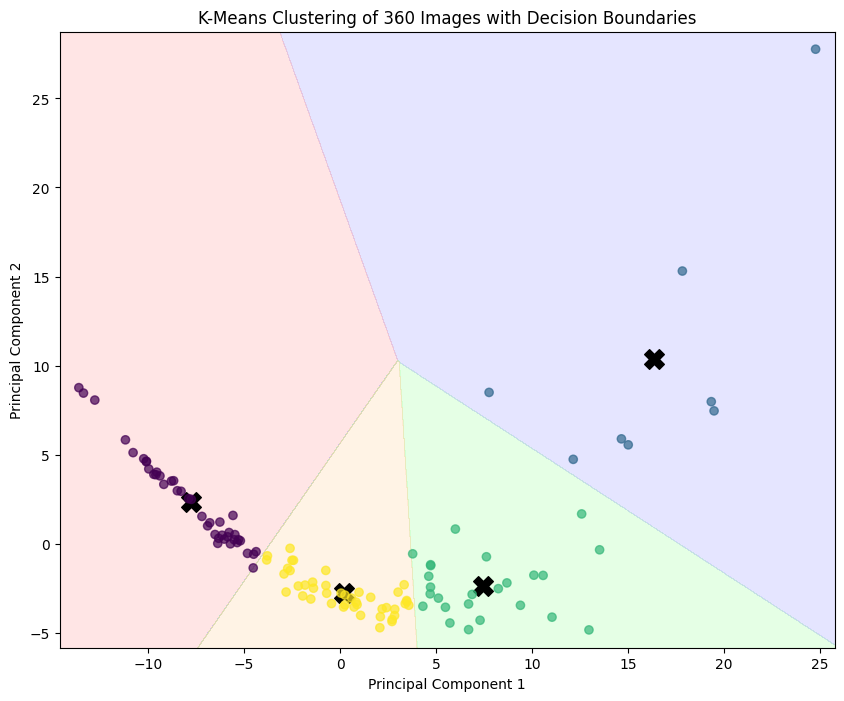

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


# Assuming you already have the images and labels loaded
# X: Images, labels: Image labels

# Flatten and standardize the data
X_flat = X.reshape(X.shape[0], -1)
X_standardized = StandardScaler().fit_transform(X_flat)

# Perform PCA to reduce dimensionality to two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Determine the optimal number of clusters using the Elbow Method
# You can also use other methods like the Silhouette Score
# Example using the Elbow Method
inertia_values = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 8))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

# Choose the optimal number of clusters (elbow point in the plot)
optimal_num_clusters = 4  # Adjust based on the visual analysis of the Elbow Method

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize the clustering result with decision boundaries
plt.figure(figsize=(10, 8))

# Plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain cluster predictions for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot filled contour map
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFD8AA'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X')

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of 360 Images with Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


From the plot, we can observe that the silhouette score peaks at 3 clusters with a score above 0.55, which suggests that the data points within each of the three clusters are, on average, closer to each other than they are to points in different clusters. This peak indicates that three clusters may be the optimal number for this dataset since it achieves a balance between cohesion and separation.

The subsequent drop in the silhouette score as the number of clusters increases indicates that additional clusters do not contribute to a clearer or more defined separation. In other words, having more than three clusters might lead to overlapping or less distinct clusters, reducing the effectiveness of the clustering.

In summary, the silhouette analysis supports the choice of three clusters as the most appropriate for the PCA-transformed data as compared to elbow method.This coherence between different cluster validation metrics strengthens the confidence in the clustering solution.

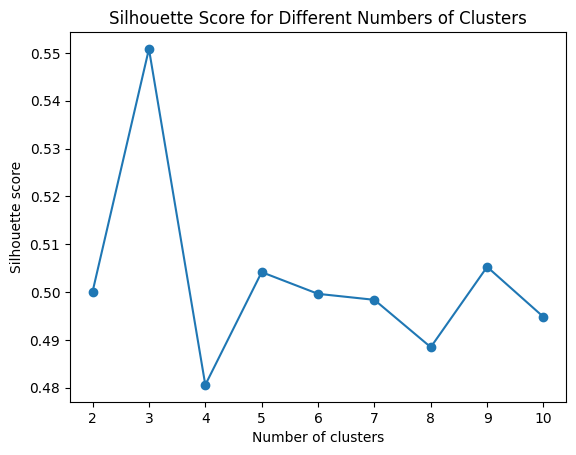

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have the PCA-transformed data X_pca

silhouette_scores = []
for n_clusters in range(2, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


For K-means clustering:
1. Principal Components: The x-axis and y-axis of the plot represent the first and second principal components, respectively. These are the two most significant dimensions extracted from the dataset through Principal Component Analysis (PCA), which capture the greatest variance within the data.

2. K-Means Clusters: The different colors and labels (Cluster 0, Cluster 1, Cluster 2, and Cluster 3) represent 4 distinct groups identified by the K-Means clustering algorithm. K-Means is an unsupervised learning algorithm that partitions the data into k mutually exclusive clusters, and here it has been set to find four clusters.

3. Data Points: Each point on the scatter plot corresponds to an individual data item (in your case, an image) that has been assigned to one of the four clusters based on its similarity to others. The proximity of points within the same cluster indicates that they share similar characteristics.

4. Cluster Distribution: The plot shows how these clusters are distributed in the space formed by the two principal components. For instance, Cluster 0 is spread along the negative side of Principal Component 1, while Clusters 1, 2, and 3 are more centrally located but separated along the Principal Component 2 axis.

5. Cluster Separation and Overlap: There appears to be good separation between most of the clusters, although there is some overlap, especially between Clusters 1, 2, and 3. This overlap might suggest some shared characteristics between the images in these clusters or that a different number of clusters might provide a clearer separation.

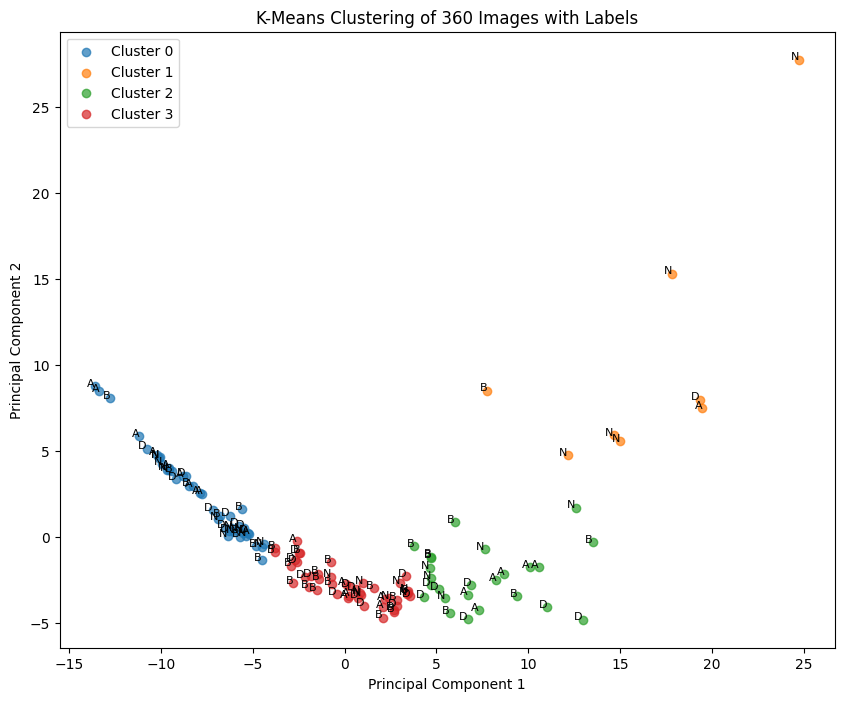

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Flatten and standardize the data
X_flat = X.reshape(X.shape[0], -1)
X_standardized = StandardScaler().fit_transform(X_flat)

# Perform PCA to reduce dimensionality to two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Determine the optimal number of clusters using the Elbow Method
# You can also use other methods like the Silhouette Score
# Example using the Elbow Method
inertia_values = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Choose the optimal number of clusters (elbow point in the plot)
optimal_num_clusters = 4  # Adjust based on the visual analysis of the Elbow Method

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize the clustering result with colors based on the labels
plt.figure(figsize=(10, 8))

for cluster_num in range(optimal_num_clusters):
    cluster_mask = (clusters == cluster_num)
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                label=f'Cluster {cluster_num}', alpha=0.7)

# Add labels to each point based on the filename labels (I, M, S)
for i, label in enumerate(labels):
    plt.text(X_pca[i, 0], X_pca[i, 1], label[0], color='black', fontsize=8, ha='right')

plt.title('K-Means Clustering of 360 Images with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


###6. Cluster the 360 images using EM.

###A. Same as in the previous question, to speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class.

BIC for Optimal Number of Clusters (EM Algorithm):

The first image is a plot of the Bayesian Information Criterion (BIC) against the number of clusters. The BIC is a criterion for model selection among a finite set of models; the model with the lowest BIC is generally preferred. It is particularly useful in clustering to balance model complexity with goodness of fit.
In the plot, we observe that the BIC sharply decreases from 1 to 4 clusters and then levels off, with minor fluctuations as the number of clusters increases to 10. The point of leveling off, where further increases in the number of clusters do not result in significant decreases in BIC, typically indicates the optimal number of clusters. In this case, it suggests that 4 clusters might be the appropriate choice for this dataset.



###B. Visualize the clusters

EM Algorithm Clustering of Data with Decision Boundaries:

The second image shows the result of clustering using the EM algorithm visualized on the first two principal components. The EM algorithm is a probabilistic approach that assigns a probability of membership to each point for each cluster, rather than an absolute assignment as in K-Means.
The plot displays the data points colored according to the cluster they most likely belong to, with decision boundaries that are likely based on the Gaussian models inferred by the EM algorithm. Unlike K-Means, EM can accommodate clusters that have different sizes and correlation structures within them.

BIC uses maximum likelihood estimation and is used for selecting the best-fitting model among a set of candidate models. In my case, BIC gives the optimal cluster count as 4 which is exactly aligned with the number of leaf categories in my dataset

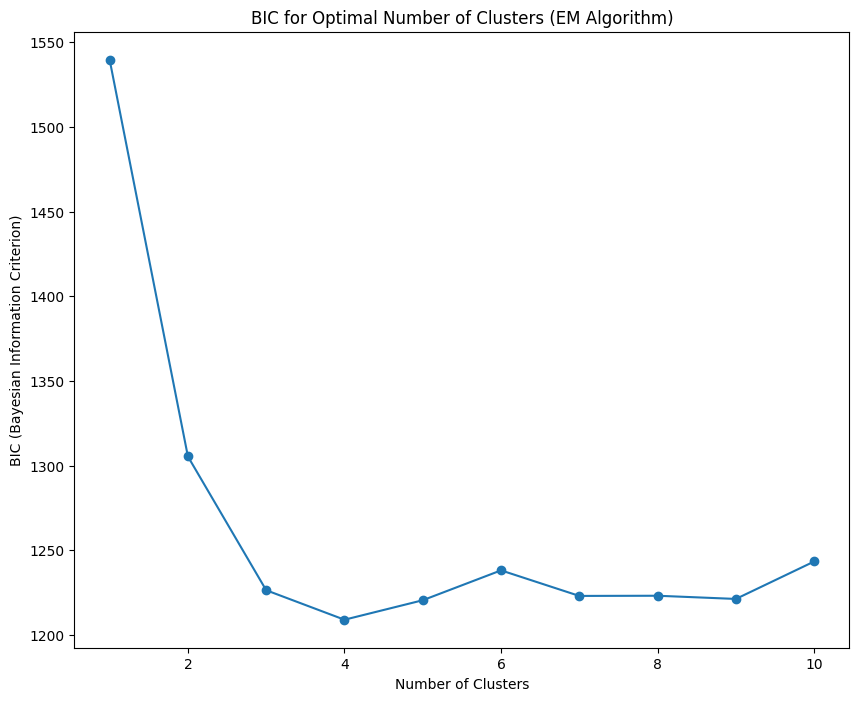

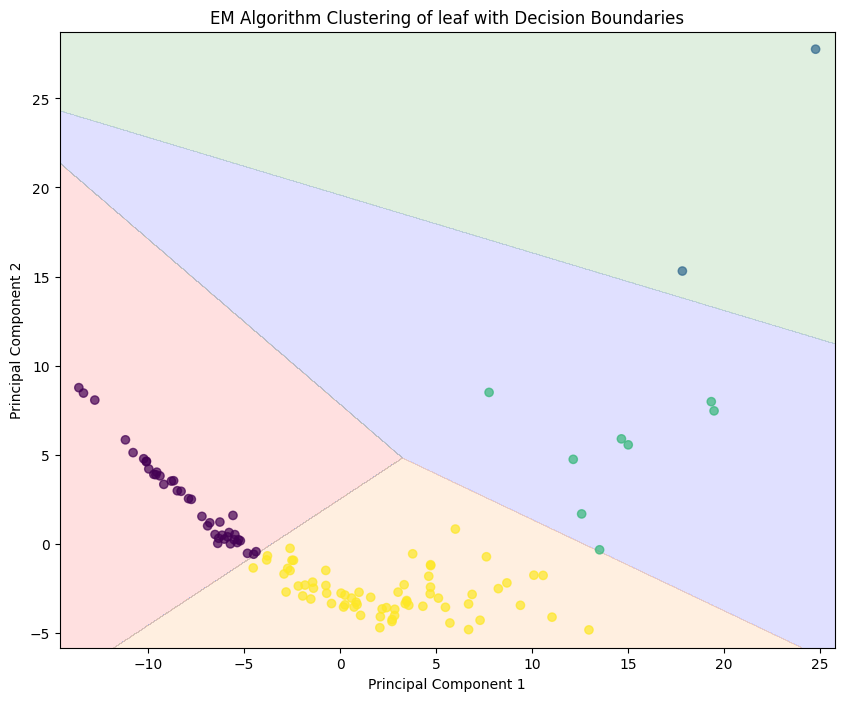

In [ ]:

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap



# Flatten and standardize the data
X_flat = X.reshape(X.shape[0], -1)
X_standardized = StandardScaler().fit_transform(X_flat)

# Perform PCA to reduce dimensionality to two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Determine the optimal number of clusters using BIC
bic_values = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_pca)
    bic_values.append(gmm.bic(X_pca))

# Plot the BIC values
plt.figure(figsize=(10, 8))
plt.plot(cluster_range, bic_values, marker='o')
plt.title('BIC for Optimal Number of Clusters (EM Algorithm)')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC (Bayesian Information Criterion)')
plt.show()

# Choose the optimal number of clusters (minimum BIC)
optimal_num_clusters = np.argmin(bic_values) + 1

# Apply EM algorithm with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_num_clusters, covariance_type = 'tied', random_state=42)
clusters = gmm.fit_predict(X_pca)

# Visualize the clustering result with decision boundaries
plt.figure(figsize=(10, 8))

# Plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain cluster predictions for each point in the meshgrid
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot filled contour map
cmap_background = ListedColormap(['#FF9999', '#99CC99', '#9999FF', '#FFCC99'])  # Red, Green, Blue, Orange
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('EM Algorithm Clustering of leaf with Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


###C. Use the model to generate 20 new leaves (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).



Gaussian Mixture Model (GMM): A GMM has been used to generate new data samples. It is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. The gmm.sample(20) function suggests that 20 new data points were sampled from this model.

PCA Inverse Transform: After generating the samples in a reduced dimensionality space (where PCA has previously been applied to reduce the feature space), the pca.inverse_transform(new_samples) function is used to map these samples back into the original image space. This is possible because PCA is a linear transformation, and it can be reversed from the principal component scores back to the original variables, albeit with some loss of information if the number of components used was less than the original number of features.

Visualization: The plt.imshow function is used to visualize each of the generated samples. Since the code snippet mentions reshaping to (20, 20), it is implied that the original images are 20x20 pixels in size. The images have been reshaped back into their original dimensions for visualization purposes.

Output: The result is a set of images that, while not as sharp as original photographs due to the generation and inverse transformation process, likely capture the key characteristics of leaves as learned by the GMM from the data it was trained on. This can be useful for understanding the diversity of leaf shapes and forms that the model has learned to represent.

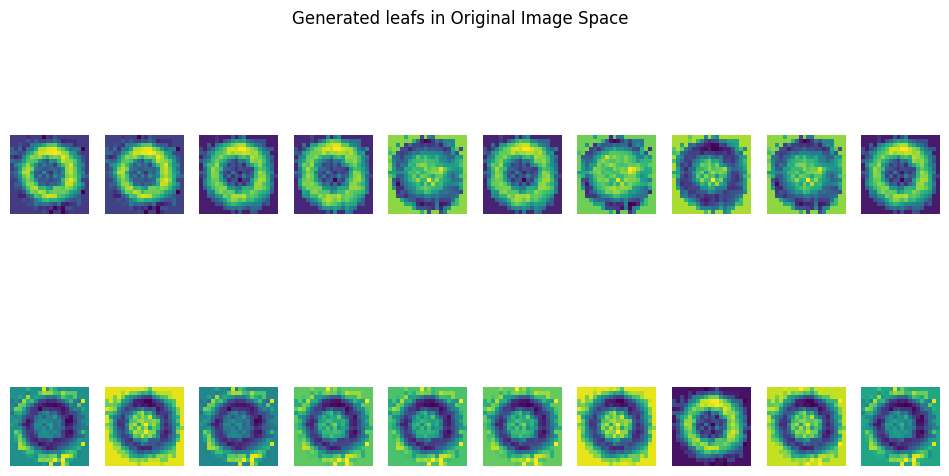

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have a trained GMM named 'gmm'
# Replace 'num_components' with the actual number of components in your GMM
num_components = 10  # Adjust based on your GMM

# Generate 20 new samples from the GMM
new_samples, _ = gmm.sample(20)

# Assuming you have a trained PCA model named 'pca'
# Use PCA's inverse_transform to map samples back to the original space
original_space_samples = pca.inverse_transform(new_samples)

# Visualize the new samples in the original image space
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_space_samples[i].reshape((20, 20)))  # Adjust the reshape dimensions
    plt.axis('off')

plt.suptitle('Generated leafs in Original Image Space')
plt.show()


###7. Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch).

In [ ]:
folder_path = '/content/drive/MyDrive/aml-homework1-shared-folder/Grapevine_Leaves_Image_Dataset/test'


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image

In [ ]:
from PIL import Image
import numpy as np
import os
from tensorflow.keras.utils import to_categorical

def load_images(folder):
    images = []
    labels = []
    # Corrected label_map definition
    label_map = {'A': 0, 'B': 1, 'D': 2, 'N': 3}  # Map labels to integers
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).convert('RGB')
        if img is not None:
            img = img.resize((64, 64))  # Resize to 64x64 or your choice
            images.append(np.array(img))
            labels.append(label_map[filename[0]])  # Map the label
    return np.array(images), np.array(labels)

# Load images and labels
train_images, train_labels = load_images('/content/drive/MyDrive/aml-homework1-shared-folder/Grapevine_Leaves_Image_Dataset/train')
val_images, val_labels = load_images('/content/drive/MyDrive/aml-homework1-shared-folder/Grapevine_Leaves_Image_Dataset/test')

# Normalize pixel values to be between 0 and 1
train_images, val_images = train_images / 255.0, val_images / 255.0

# Convert labels to one-hot encoding
num_classes = 4  # Corrected number of classes
train_labels = to_categorical(train_labels, num_classes=num_classes)
val_labels = to_categorical(val_labels, num_classes=num_classes)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 output neurons for 4 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


###A. Report the training time
The total training time required for executing 20 epochs of the network is about 23.23 seconds.

As training progresses, a consistent improvement is observed, with a significant reduction in loss and increase in accuracy.

By the 20th epoch, the model reaches a training accuracy of approximately 93.28% and a validation accuracy of approximately 43.50%. The training loss has decreased to about 0.5257, while the validation loss is around 1.3062. The model is still learning as the validation loss is decreasing.

In [ ]:
import time

start_time = time.time()

history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/20
4/4 [==============================] - 4s 460ms/step - loss: 4.7568 - accuracy: 0.2857 - val_loss: 3.6046 - val_accuracy: 0.3164
Epoch 2/20
4/4 [==============================] - 1s 229ms/step - loss: 3.6408 - accuracy: 0.2353 - val_loss: 2.0739 - val_accuracy: 0.3164
Epoch 3/20
4/4 [==============================] - 1s 233ms/step - loss: 1.9277 - accuracy: 0.2773 - val_loss: 1.7949 - val_accuracy: 0.2712
Epoch 4/20
4/4 [==============================] - 1s 234ms/step - loss: 1.7365 - accuracy: 0.2689 - val_loss: 1.5658 - val_accuracy: 0.2429
Epoch 5/20
4/4 [==============================] - 1s 236ms/step - loss: 1.4714 - accuracy: 0.3445 - val_loss: 1.6135 - val_accuracy: 0.2260
Epoch 6/20
4/4 [==============================] - 1s 153ms/step - loss: 1.4372 - accuracy: 0.2689 - val_loss: 1.3961 - val_accuracy: 0.2260
Epoch 7/20
4/4 [==============================] - 0s 133ms/step - loss: 1.3090 - accuracy: 0.3025 - val_loss: 1.3611 - val_accuracy: 0.2712
Epoch 8/20
4/4 [====

###B. Plot training and validation loss and accuracy as a function of training epochs.
- Accuracy Plot: This graph shows both the training accuracy (accuracy) and the validation accuracy (val_accuracy) over epochs. There is a noticeable difference between the training and validation accuracy, with the training accuracy being higher. After a steep increase in the initial epochs, the training accuracy shows a slight fluctuation but generally trends upward.

- Loss Plot: The second graph displays the training loss (loss) and the validation loss (val_loss). Both losses decrease sharply at first, indicating that the model is quickly learning from the training data. As the epochs continue, both losses plateau, with the training loss being lower than the validation loss. This is expected as the model is directly trained to minimize the training loss.

Observations:

- There is a consistent decrease in loss over time for both training and validation, which is a positive sign of learning.


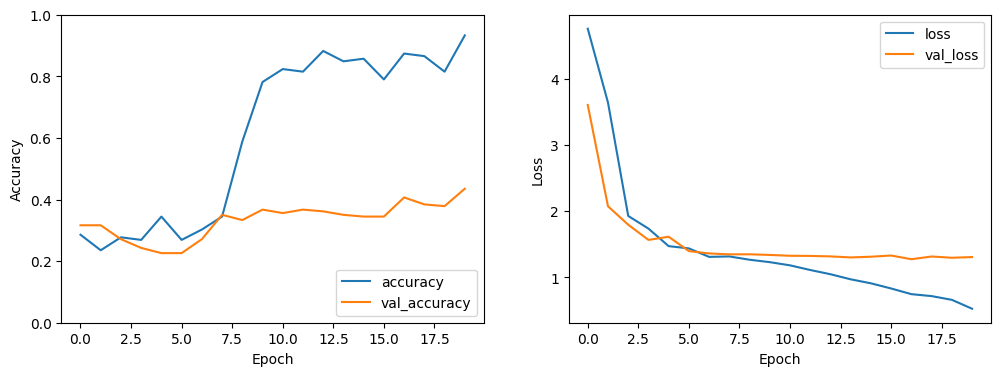

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


###C. How many parameters does the network have? How many of those parameters are bias parameters?
The data, as described in the model summary has a total of 196,348 parameters, all of which are trainable. Out of these, 100 are bias parameters.

Here's how the number of bias parameters are calculated:

For the conv2d_2 (Conv2D) layer: There are 32 filters, and each filter has 1 bias term, so that's 32 bias parameters.

The max_pooling2d_2 (MaxPooling2D) layer does not have any parameters, as pooling layers do not have weights or biases.

The flatten_1 (Flatten) layer also does not have parameters since it only reshapes the input data.

For the dense_3 (Dense) layer: It's fully connected with 64 units, so there are 64 bias parameters.

For the dense_4 (Dense) layer: It's fully connected with 4 units, so there are 4 bias parameters.

Adding these up, 32+64+4=100 bias parameters.





In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1968192   
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1969348 (7.51 MB)
Trainable params: 1969348 (7.51 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
biased_parameters = sum([layer.bias.shape[0] for layer in model.layers if hasattr(layer, 'bias') and layer.bias is not None])
print(f"Total number of biased parameters: {biased_parameters}")

Total number of biased parameters: 100


REFERENCES:

1. Kaggle
2. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems -by Geron Aurelien
3. Github repo provided in class-  https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb
